# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:

* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [67]:
df = pd.read_csv("multipleChoiceResponses_cleaned.csv", encoding='latin1')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
for name in df.columns:
    print(name)

GenderSelect
Country
Age
EmploymentStatus
StudentStatus
LearningDataScience
CodeWriter
CareerSwitcher
CurrentJobTitleSelect
TitleFit
CurrentEmployerType
MLToolNextYearSelect
MLMethodNextYearSelect
LanguageRecommendationSelect
PublicDatasetsSelect
LearningPlatformSelect
LearningPlatformUsefulnessArxiv
LearningPlatformUsefulnessBlogs
LearningPlatformUsefulnessCollege
LearningPlatformUsefulnessCompany
LearningPlatformUsefulnessConferences
LearningPlatformUsefulnessFriends
LearningPlatformUsefulnessKaggle
LearningPlatformUsefulnessNewsletters
LearningPlatformUsefulnessCommunities
LearningPlatformUsefulnessDocumentation
LearningPlatformUsefulnessCourses
LearningPlatformUsefulnessProjects
LearningPlatformUsefulnessPodcasts
LearningPlatformUsefulnessSO
LearningPlatformUsefulnessTextbook
LearningPlatformUsefulnessTradeBook
LearningPlatformUsefulnessTutoring
LearningPlatformUsefulnessYouTube
BlogsPodcastsNewslettersSelect
LearningDataScienceTime
JobSkillImportanceBigData
JobSkillImportanceDegre

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [69]:
"""
Null Hypothesis: There is no salary difference between having your highest education level as a Masters rather than a Bachelors alone. 
Alternate Hypothesis: There is a salary difference between having your highest education level as a Masters rather than a Bachelors alone. 

Now both of these should contain numeric values with samples that are not huge since the amount of rows are 228 including both Masters and Bachelors. 
The most appropriate test would be the Welch's t-test. 
The Welch's t-test is a further adaptation that accounts for additional perturbations in the underlying assumptions of the model. 
Specifically, the t-test assumes that the samples are of equal size and equal variance. 
When these assumptions are not met, then Welch's t-test provides a more accurate p-value.
In this case we do not know the variance and we also do not know if the samples are of equal size 
"""

"\nNull Hypothesis: There is no salary difference between having your highest education level as a Masters rather than a Bachelors alone. \nAlternate Hypothesis: There is a salary difference between having your highest education level as a Masters rather than a Bachelors alone. \n\nNow both of these should contain numeric values with samples that are not huge since the amount of rows are 228 including both Masters and Bachelors. \nThe most appropriate test would be the Welch's t-test. \nThe Welch's t-test is a further adaptation that accounts for additional perturbations in the underlying assumptions of the model. \nSpecifically, the t-test assumes that the samples are of equal size and equal variance. \nWhen these assumptions are not met, then Welch's t-test provides a more accurate p-value.\nIn this case we do not know the variance and we also do not know if the samples are of equal size \n"

In [70]:
# Subset the appropriate data into 2 groups

# Defines two variables, Education and Comp, which represent the names of two columns in the DataFrame
Education = 'FormalEducation'
Comp = 'AdjustedCompensation'
# Specify two categories within the "FormalEducation" column that will be used to subset the data
Level_Education1 = "Master's degree"
Level_Education2 = "Bachelor's degree"
# Check if the Education and Comp columns have any null values. The '~' operator is a logical negation operator.
# If the column does not contain a null value the, the .isnull() method would return True. 
# We want to keep those True values so the '~' operator inverse True -> False. 

# Ovrall we select rows where both the "FormalEducation" and "AdjustedCompensation" columns have non-null values.
subset = df[(~df[Education].isnull()) & (~df[Comp].isnull())]

s1 = subset[subset[Education]==Level_Education1][Comp]
s2 = subset[subset[Education]==Level_Education2][Comp]

<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

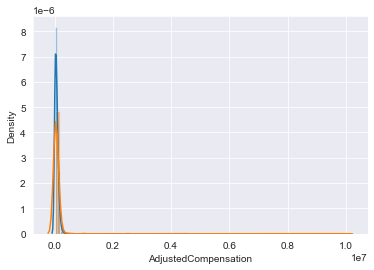

In [71]:
sns.distplot(s1)
sns.distplot(s2)

In [72]:
print('Comparison of {} for {} and {}'.format(Comp, Level_Education1, Level_Education2))
print("Median Values: \ts1: {} \ts2: {}".format(round(s1.median(),2), round(s2.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(s1.mean(),2), round(s2.mean(),2)))
print('Sample sizes: \ts1: {} \ts2: {}'.format(len(s1), len(s2)))
# Perform Welch's t-test and print the p-value
t_statistic, p_value = scipy.stats.ttest_ind(s1, s2, equal_var=False)
# The method is two tailed and we only care about one side
p_value = 1 - p_value
print("Welch's t-test p-value:", p_value)

Comparison of AdjustedCompensation for Master's degree and Bachelor's degree
Median Values: 	s1: 53812.17 	s2: 38399.4
Mean Values: 	s1: 69139.9 	s2: 64887.1
Sample sizes: 	s1: 1990 	s2: 1107
Welch's t-test p-value: 0.3384472109745511


In [73]:
"""
Based off the distplot we can see how there seems to be outliers that may be impacting the Mean  Values since our medians are so different. 
"""

'\nBased off the distplot we can see how there seems to be outliers that may be impacting the Mean  Values since our medians are so different. \n'

In [74]:
#Investigate Percentiles for our samples

# subset s1 
q1_s1 = np.percentile(a=s1, q=25)
q3_s1 = np.percentile(a=s1, q=75)
IQR_s1 = q3_s1 - q1_s1
# Determine limits
lower_fence1 = q1_s1 - 1.5 * IQR_s1
upper_fence1 = q3_s1 + 1.5 * IQR_s1

print("Lower fence:", lower_fence1)
print("Upper fence:", upper_fence1)

Lower fence: -83330.0
Upper fence: 197198.0


In [75]:
# subset s1 
q1_s2 = np.percentile(a=s2, q=25)
q3_s2 = np.percentile(a=s2, q=75)
IQR_s2 = q3_s2 - q1_s2
# Determine limits
lower_fence2 = q1_s2 - 1.5 * IQR_s2
upper_fence2 = q3_s2 + 1.5 * IQR_s2

print("Lower fence:", lower_fence2)
print("Upper fence:", upper_fence2)

Lower fence: -92181.00000000003
Upper fence: 183678.20000000004


In [76]:
print('Repeated Test with Outliers Removed:')
print('S1: {}\tS2: {}'.format(Level_Education1, Level_Education2))
outlier_threshold = 500000
s1 = subset[(subset[Education]==Level_Education1) & (subset[Comp]<=upper_fence1)][Comp]
s2 = subset[(subset[Education]==Level_Education2) & (subset[Comp]<=upper_fence2)][Comp]
print("Median Values: \ts1: {} \ts2: {}".format(round(s1.median(),2), round(s2.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(s1.mean(),2), round(s2.mean(),2)))
print('Sample sizes: \ts1: {} \ts2: {}'.format(len(s1), len(s2)))
# Perform Welch's t-test and print the p-value
t_statistic, p_value = scipy.stats.ttest_ind(s1, s2, equal_var=False)
# The method is two tailed and we only care about one side
p_value = 1 - p_value
print("Welch's t-test p-value:", p_value)

Repeated Test with Outliers Removed:
S1: Master's degree	S2: Bachelor's degree
Median Values: 	s1: 50224.69 	s2: 35667.9
Mean Values: 	s1: 58537.42 	s2: 47539.89
Sample sizes: 	s1: 1927 	s2: 1067
Welch's t-test p-value: 0.9999999999566155


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

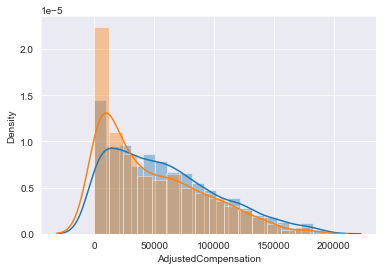

In [77]:
sns.distplot(s1)
sns.distplot(s2)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [11]:
#Your code here

Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.1568238199472023


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [ ]:
#Your code here

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!